<style>
@media print {
  pre, code,
  div.input_area pre, div.output_area pre,
  .highlight pre {
    white-space: pre-wrap !important; 
    overflow-wrap: anywhere !important;
    word-break: break-word !important;
  }

  pre, code, .highlight pre {
    font-size: 9pt !important;
    line-height: 1.2 !important;
  }

  @page {
    margin: 12mm;
  }
}
</style>


# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Elio Egidio (359806);
2. Gabriele Adino Averone (357658).

Now, fill the python list below with the Student IDs of the team

In [1]:
StudentIDs = [357658, 359806]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Healthy eating
History
Psychology
Politics
Internet
Economy Management
Chemistry
Reading
Geography
Foreign languages
Medicine
Cars
Art exhibitions
Religion
Countryside, outdoors
Musical instruments
Writing
Passive sport
Active sport
Shopping
Science and technology
Movies
Thriller
Comedy
Romantic
War
Fantasy/Fairy tales
Animated
Documentary
Western
Slow songs or fast songs
Dance
Folk
Country
Classical music
Rock
Reggae, Ska
Swing, Jazz
Latino
Opera
Daily events
Prioritising workload
Writing notes
Workaholism
Final judgement
Keeping promises
Loss of interest
Fake
Criminal damage
Self-criticism
Judgment calls
Empathy
Eating to survive
Giving
Compassion to animals
Borrowed stuff
Cheating in school
Health
God
Number of friends
Punctuality
Lying
Mood swings
Appearence and gestures
Socializing
Achievements
Chi

,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Healthy eating,History,Psychology,Politics,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
666,5,4,3,5,4,5,5,3,3,2,...,16,153,62,1,female,right,primary school,no,city,block of flats
93,2,2,3,2,2,3,3,5,2,1,...,23,156,56,0,female,right,masters degree,yes,city,house/bungalow
442,4,4,5,4,4,5,3,5,2,5,...,23,179,77,1,male,right,secondary school,yes,village,house/bungalow
495,3,5,4,5,5,3,1,1,1,1,...,19,175,80,1,male,left,secondary school,yes,village,house/bungalow
327,4,2,1,3,2,4,4,1,3,2,...,19,175,58,1,female,right,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,1,1,2,1,1,4,3,3,4,2,...,21,185,70,0,female,left,secondary school,yes,city,block of flats
221,5,1,1,1,1,3,3,2,2,2,...,19,176,68,2,female,right,secondary school,no,city,block of flats
92,2,3,5,1,4,2,2,1,3,3,...,21,180,85,2,male,right,secondary school,no,city,block of flats
594,2,4,4,5,5,5,5,2,4,4,...,26,182,76,3,male,left,secondary school,yes,city,house/bungalow



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Healthy eating,History,Psychology,Politics,...,Questionnaires or polls,Internet usage,Flying,Darkness,Heights,Spiders,Snakes,Ageing,Dangerous dogs,Fear of public speaking
666,5,4,3,5,4,5,5,3,3,2,...,2,few hours a day,1,1,1,1,1,5,3,2
93,2,2,3,2,2,3,3,5,2,1,...,4,few hours a day,4,1,2,2,4,2,2,2
442,4,4,5,4,4,5,3,5,2,5,...,3,few hours a day,1,1,2,1,2,2,4,3
495,3,5,4,5,5,3,1,1,1,1,...,2,less than an hour a day,3,1,5,3,5,2,3,3
327,4,2,1,3,2,4,4,1,3,2,...,3,less than an hour a day,3,5,4,4,5,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,1,1,2,1,1,4,3,3,4,2,...,3,few hours a day,3,2,1,1,2,3,5,5
221,5,1,1,1,1,3,3,2,2,2,...,3,few hours a day,1,2,1,5,4,1,4,4
92,2,3,5,1,4,2,2,1,3,3,...,3,few hours a day,1,1,2,1,2,2,3,3
594,2,4,4,5,5,5,5,2,4,4,...,2,less than an hour a day,3,2,4,2,3,2,3,3



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
666,16,153,62,1,female,right,primary school,no,city,block of flats
93,23,156,56,0,female,right,masters degree,yes,city,house/bungalow
442,23,179,77,1,male,right,secondary school,yes,village,house/bungalow
495,19,175,80,1,male,left,secondary school,yes,village,house/bungalow
327,19,175,58,1,female,right,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...
462,21,185,70,0,female,left,secondary school,yes,city,block of flats
221,19,176,68,2,female,right,secondary school,no,city,block of flats
92,21,180,85,2,male,right,secondary school,no,city,block of flats
594,26,182,76,3,male,left,secondary school,yes,city,house/bungalow


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [3]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [4]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

print(len(responses_ft))

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler
506


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
The only features in our dataset that require encoding are Punctuality, Lying, and Internet usage, since they are the only variables stored as strings rather than numeric values, and each of them takes values from a small, finite set of possible categories. A feasible choice would be one-hot encoding, which would not increase dimensionality excessively because the number of categories is limited; moreover, it preserves pure category membership without imposing metric relationships. However, we adopt ordinal encoding because these three variables have a clear natural ordering (e.g., “early” → “late”, “never” → “every time it suits me”, “no time at all” → “most of the day”). This choice keeps the representation compact and preserves the ranking information that is meaningful for interpretation. We assume the ordinal categories can be treated as approximately equally spaced for the purposes of scaling and PCA.
#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
We apply standard scaling so that PCA is not dominated by features with larger numerical scales. Standardization transforms each feature by subtracting its mean and dividing by its standard deviation, resulting in variables with approximately zero mean and unit variance. In practice, this corresponds to a translation and rescaling that makes all features comparable and therefore more suitable for both PCA and distance-based methods.
In addition, we perform a robustness check to ensure that no missing values remain in the dataset. If missing values are detected, we impute them using a simple and consistent rule: for variables that were originally categorical, we replace missing entries with the mode (most frequent value), while for originally numerical variables we replace them with the median, which is more robust to outliers than the mean.

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [ ]:
responses_ft_enc = responses_ft.copy()

# Get all the categories that need to be encoded
cat_cols = responses_ft_enc.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns in responses_ft:", cat_cols)

# Map for ordina encoding
ordinal_maps = {
    "Punctuality": {
        "early": 0,
        "on time": 1,
        "late": 2,
    },
    "Lying": {
        "never": 0,
        "only to avoid hurting someone": 1,
        "sometimes": 2,
        "everytime it suits me": 3,
    },
    "Internet usage": {
        "no time at all": 0,
        "less than an hour a day": 1,
        "few hours a day": 2,
        "most of the day": 3,
    },
}

for col in cat_cols:
    if col in ordinal_maps:
        responses_ft_enc[col] = responses_ft_enc[col].map(ordinal_maps[col]).astype(float)
    else:
        codes, _ = pd.factorize(responses_ft_enc[col], sort=True)
        responses_ft_enc[col] = codes.astype(float)

# check if there are missing values
# after encoding I can get some NaN if a string doesn't match the map
for col in responses_ft_enc.columns:
    if responses_ft_enc[col].isna().any():
        if col in ["Punctuality", "Lying", "Internet usage"]:
            responses_ft_enc[col] = responses_ft_enc[col].fillna(responses_ft_enc[col].mode().iloc[0])
        else:
            responses_ft_enc[col] = responses_ft_enc[col].fillna(responses_ft_enc[col].median())

scaler = StandardScaler()

X_pp = scaler.fit_transform(responses_ft_enc.values.astype(float))
responses_ft_pp = pd.DataFrame(X_pp, index=responses_ft_enc.index, columns=responses_ft_enc.columns)


print("Max |mean| (should be ~0):", float(np.abs(responses_ft_pp.mean()).max()))
print("Max |std-1| (ddof=0, should be ~0):", float(np.abs(responses_ft_pp.std(ddof=0) - 1).max()))


Categorical columns in responses_ft: ['Punctuality', 'Lying', 'Internet usage']
Max |mean| (should be ~0): 3.914304102630987e-16
Max |std-1| (ddof=0, should be ~0): 2.220446049250313e-16


#### Comment the results obtained after the preprocessing operation (max 100 words):

After preprocessing, all selected features are numeric and free of missing values, so they can be safely used for PCA and clustering. Categorical variables were encoded consistently, preserving their natural ordering, and the subsequent standardization produced features with mean close to 0 and standard deviation close to 1 (up to numerical precision). This scaling prevents variables with larger original variability from dominating the analysis and makes distances comparable across dimensions. Overall, the processed dataset is well-conditioned for PCA: variance is now comparable across features, and the resulting principal components will reflect correlation structure rather than arbitrary differences in scale.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

Var enc: min = 0.2540619287912637
	 median = 1.4752612913808993
	 min = 2.385059132309519
Var pp: min = 0.9999999999999996
	 median = 1.0
	 min = 1.0000000000000004


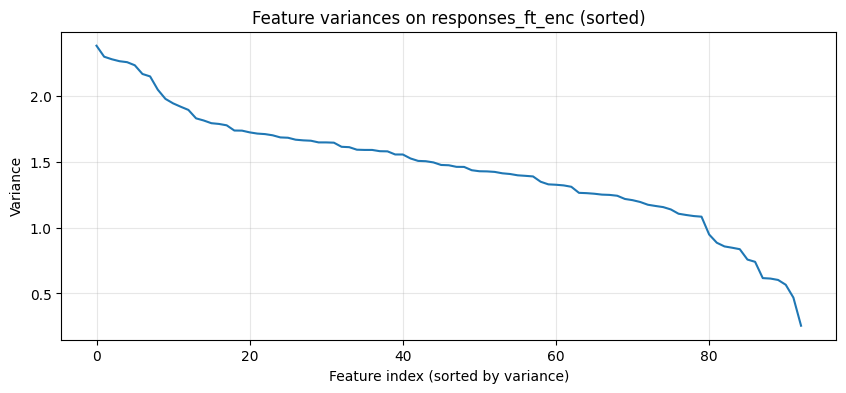

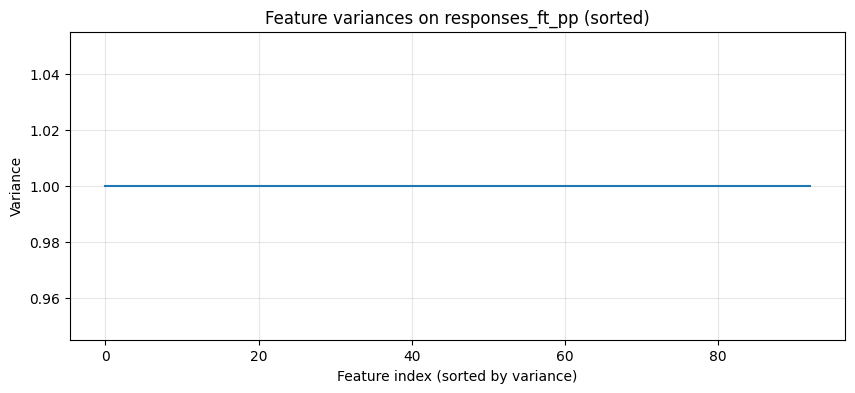

In [ ]:
def plot_sorted_variances(var_series, title, ylabel="Variance"):
    v = var_series.sort_values(ascending=False).values
    plt.figure(figsize=(10,4))
    plt.plot(v)
    plt.title(title)
    plt.xlabel("Feature index (sorted by variance)")
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.show()

var_enc = responses_ft_enc.var(axis=0, ddof=0)
var_pp  = responses_ft_pp.var(axis=0, ddof=0)

print(f"Var enc: min = {float(var_enc.min())}\n\t median = {float(var_enc.median())}\n\t min = {float(var_enc.max())}")
print(f"Var pp: min = {float(var_pp.min())}\n\t median = {float(var_pp.median())}\n\t min = {float(var_pp.max())}")



plot_sorted_variances(var_enc, "Feature variances on responses_ft_enc (sorted)")
plot_sorted_variances(var_pp,  "Feature variances on responses_ft_pp (sorted)")


#### Comment the results obtained for the variances (max 150 words):
In responses_ft_enc, the feature variances are clearly non-uniform: after sorting, the variance curve decreases smoothly from the most variable features (above ~2) down to much smaller values (below ~0.5). This indicates that different variables have very different spreads, so methods based on variance (e.g., PCA) would be influenced more by the high-variance features. In contrast, in responses_ft_pp the sorted variance curve is essentially flat at approximately 1 for all features. This is the expected effect of applying StandardScaler, which centers each feature and rescales it to have unit variance (up to numerical precision). As a consequence, the preprocessed dataset provides a balanced representation where all features contribute on a comparable scale, making subsequent PCA and clustering less dependent on the original magnitude of individual variables.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

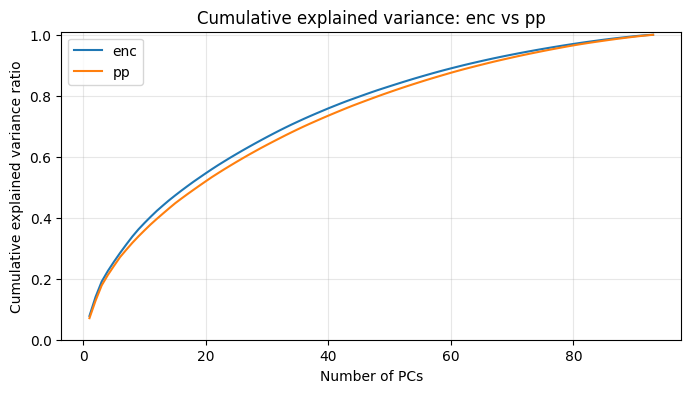

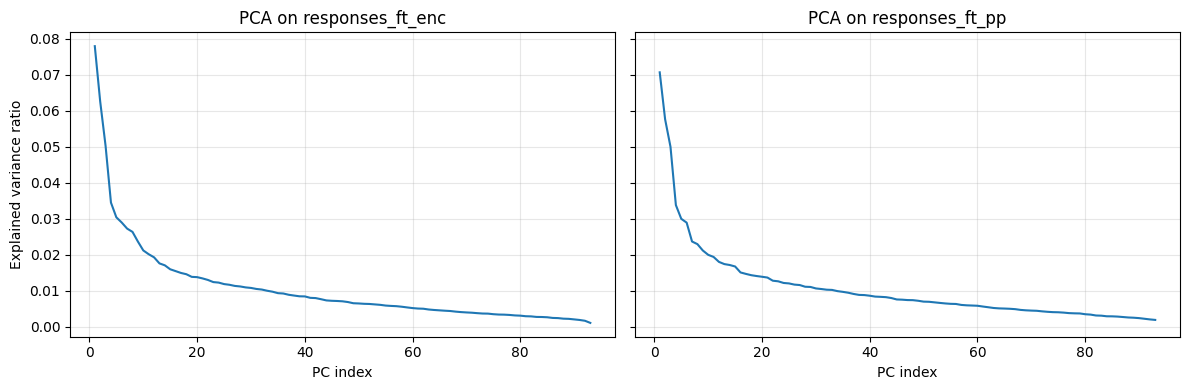

In [7]:
# PCA on responses_ft_enc 
X_enc = responses_ft_enc.values.astype(float)
d_enc = X_enc.shape[1]

pca_enc = PCA(n_components=d_enc, svd_solver="full")
pca_enc.fit(X_enc)

evr_enc = pca_enc.explained_variance_ratio_
cum_enc = np.cumsum(evr_enc)

# PCA on responses_ft_pp
X_pp = responses_ft_pp.values.astype(float)
d_pp = X_pp.shape[1]

pca_pp = PCA(n_components=d_pp, svd_solver="full")
pca_pp.fit(X_pp)

evr_pp = pca_pp.explained_variance_ratio_
cum_pp = np.cumsum(evr_pp)

# cumulative variance of resposes_ft_enc and responses_ft_pp on the same graph
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, responses_ft_enc.shape[1]+1), cum_enc, label="enc")
plt.plot(np.arange(1, responses_ft_pp.shape[1]+1),  cum_pp,  label="pp")
plt.title("Cumulative explained variance: enc vs pp")
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative explained variance ratio")
plt.ylim(0, 1.01)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].plot(np.arange(1, d_enc + 1), evr_enc)
axes[0].set_title("PCA on responses_ft_enc")
axes[0].set_xlabel("PC index")
axes[0].set_ylabel("Explained variance ratio")
axes[0].grid(True, alpha=0.3)

axes[1].plot(np.arange(1, d_pp + 1), evr_pp)
axes[1].set_title("PCA on responses_ft_pp")
axes[1].set_xlabel("PC index")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



#### Comment the results obtained for the cumulative explained variances, knowing the values in the datasets and the fetures' variances (max 150 words):

In general, PCA on responses_ft_enc is more influenced by features with larger variance (i.e., a PCA on the covariance matrix), whereas PCA on responses_ft_pp is closer to a PCA on the correlation matrix, since standardization makes the features comparable in scale. In our case, the strong similarity between the cumulative explained-variance curves suggests that the dominant structure is driven mainly by correlations among responses rather than by differences in feature scale. Finally, the cumulative curve increases relatively slowly, indicating that variance is spread across many directions: achieving high levels of preserved variance would require a non-negligible number of principal components.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

m' (>=33% variance) = 9
m = min(m', 5) = 5
Explained variance preserved by first m PCs: 24.21%


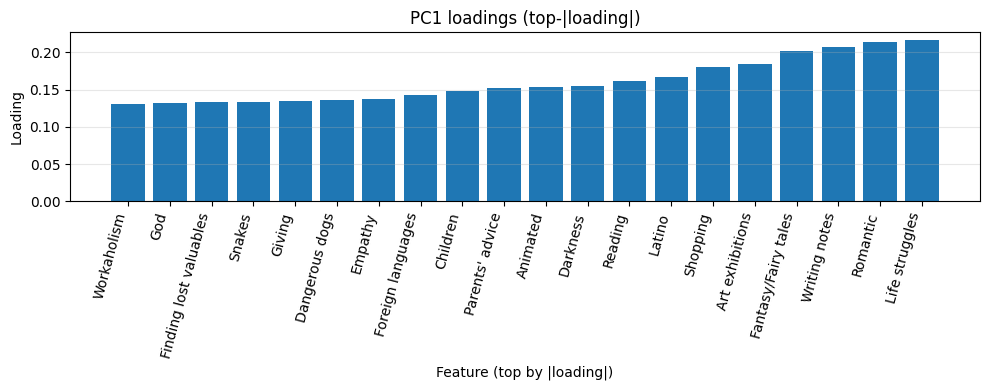

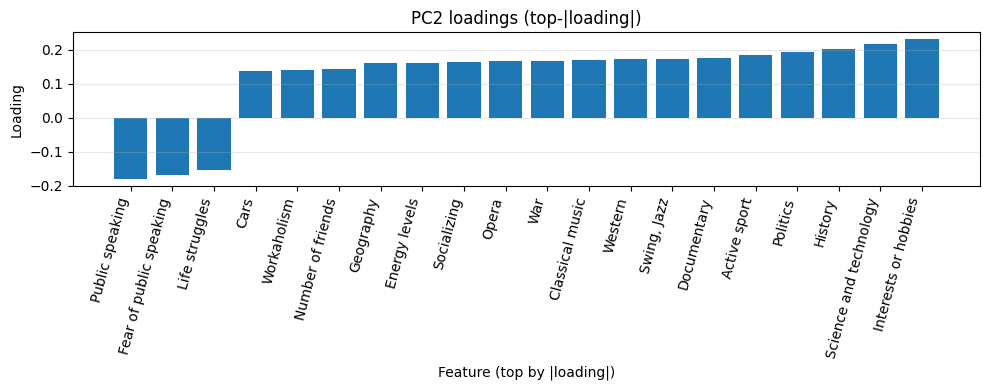

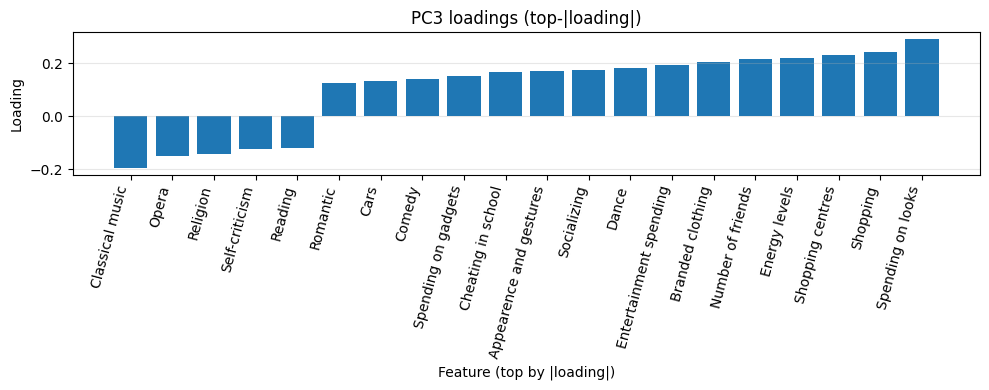

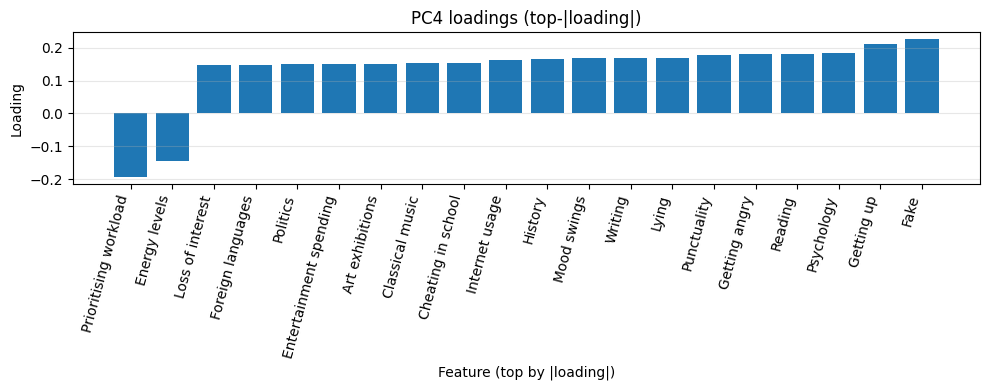

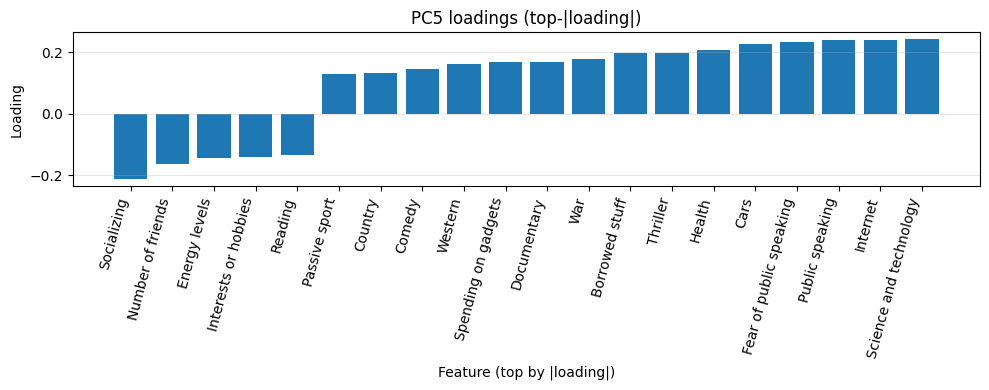

In [ ]:
X = responses_ft_pp.values.astype(float)
feature_names = responses_ft_pp.columns.to_list()
d = X.shape[1]

# PCA 'complete'
pca_full = PCA(n_components=d, svd_solver="full", random_state=0)
pca_full.fit(X)

evr_full = pca_full.explained_variance_ratio_
cum_full = np.cumsum(evr_full)

target = 0.33
m_prime = int(np.searchsorted(cum_full, target) + 1)
m = min(m_prime, 5)


print(f"m' (>=33% variance) = {m_prime}")
print(f"m = min(m', 5) = {m}")
print(f"Explained variance preserved by first m PCs: {cum_full[m-1]*100:.2f}%")

pca = PCA(n_components=m, svd_solver="full", random_state=0)
pca.fit(X)

evr = pca.explained_variance_ratio_
preserved_pct = evr.sum() * 100

def plot_pc_loadings(pc_vec, feature_names, pc_title, top_k=20):
    s = pd.Series(pc_vec, index=feature_names)
    s = s.reindex(s.abs().sort_values(ascending=False).head(top_k).index)  # top-k per |loading|
    s = s.sort_values()

    plt.figure(figsize=(10,4))
    plt.bar(s.index, s.values)
    plt.title(pc_title)
    plt.xlabel("Feature (top by |loading|)")
    plt.ylabel("Loading")
    plt.xticks(rotation=75, ha="right")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

components = pca.components_  # shape (m, d) -> each row is a PC

for i in range(m):
    plot_pc_loadings(components[i], feature_names, f"PC{i+1} loadings (top-|loading|)")


#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

**PC1 – “Imagination & Sensitivity”**<br>
This component shows high positive loadings on Romantic, Fantasy/Fairy tales, Writing notes, Art exhibitions, Reading, and Latino, together with prosocial traits such as Empathy and Giving. Overall, it captures an emotional and creative orientation combined with cultural interests, i.e., a “sensitive/expressive” profile versus a less emotionally driven one.

**PC2 – “Social Confidence vs Public-Speaking Anxiety”**<br>
PC2 contrasts high scores on Socializing, Number of friends, and Energy levels (often accompanied by broad interests such as History/Politics/Science and Active sport) with negative loadings on Public speaking and Fear of public speaking. This axis therefore represents social activation and confidence versus discomfort in public/social exposure.

**PC3 – “Social–Consumer Lifestyle vs Traditional/Introspective Tastes**<br>
PC3 is driven by consumer and leisure-related variables (Shopping centres, Shopping, Spending on looks, Branded clothing, Entertainment spending, Dance) opposed to more traditional or reflective preferences (Classical music, Opera, Religion, Self-criticism, Reading). It separates a socially oriented, consumption/appearance-focused lifestyle from more introspective and classical tastes.

**PC4 – “Volatility vs Conscientiousness**<br>
This component links higher loadings on behavioural instability markers (Fake, Lying, Getting angry, Mood swings, Cheating in school, Loss of interest) with lower loadings on Prioritising workload and Energy levels. It can be interpreted as a “self-control/conscientiousness” axis versus impulsivity, inconsistency, and emotional volatility.

**PC5 – “Tech/Media Focus vs Social Vitality”**<br>
PC5 emphasizes interest in technology/media-related variables (Internet, Science and technology, Cars and some movie genres such as Thriller/War/Documentary) against traits related to social vitality (Socializing, Number of friends, Energy levels). It suggests an orientation toward tech/media consumption versus a more socially active and energetic profile.

#### Write the code for visualizing the score graph (with PC names on the axis):

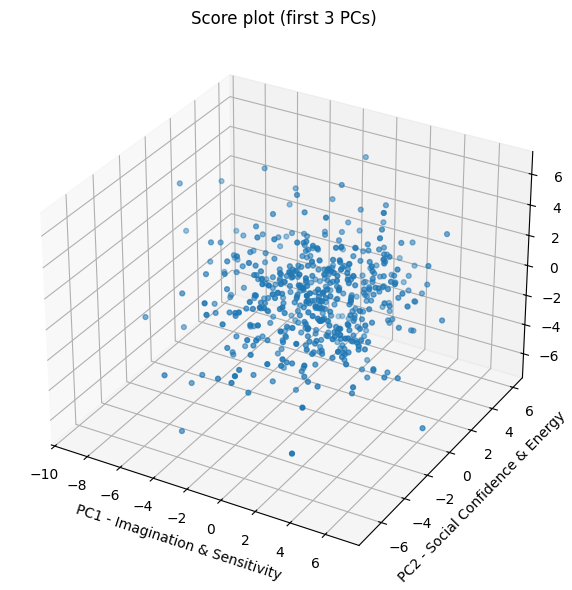

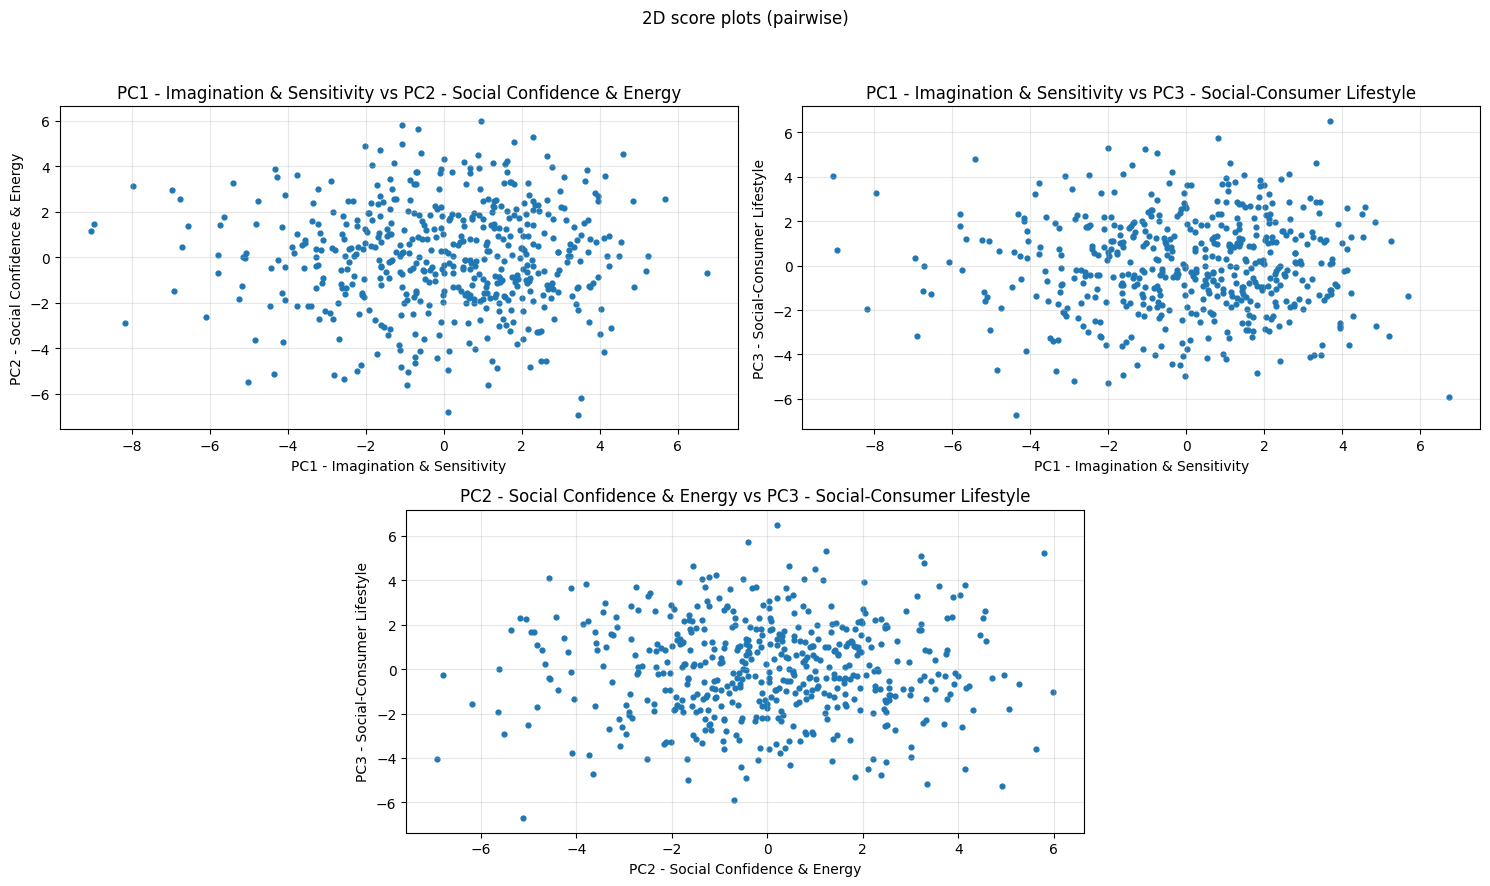

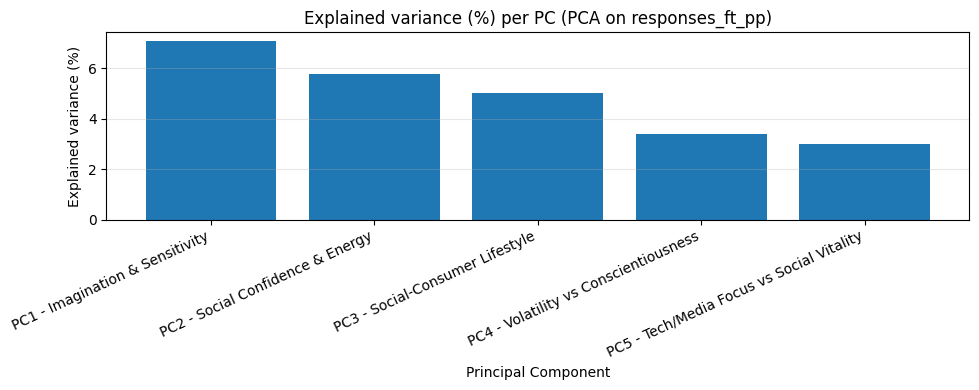

Preserved explained variance by m=5 PCs: 24.21%

===== PC1 =====
Top positive loadings:


,loading
Life struggles,0.215817
Romantic,0.213115
Writing notes,0.206731
Fantasy/Fairy tales,0.202205
Art exhibitions,0.184824
Shopping,0.180685
Latino,0.166368
Reading,0.161254


Top negative loadings:


,loading
Cars,-0.118089
Internet usage,-0.113234
War,-0.103352
Spending on gadgets,-0.101608
Slow songs or fast songs,-0.093899
Criminal damage,-0.086576
Western,-0.084957
Entertainment spending,-0.080254



===== PC2 =====
Top positive loadings:


,loading
Interests or hobbies,0.231025
Science and technology,0.217350
History,0.203773
Politics,0.193296
Active sport,0.185865
Documentary,0.177103
"Swing, Jazz",0.173863
Western,0.172135


Top negative loadings:


,loading
Public speaking,-0.181704
Fear of public speaking,-0.168838
Life struggles,-0.154928
Spiders,-0.136424
Dangerous dogs,-0.136165
Snakes,-0.117758
Darkness,-0.114519
Mood swings,-0.109656



===== PC3 =====
Top positive loadings:


,loading
Spending on looks,0.291431
Shopping,0.241185
Shopping centres,0.229025
Energy levels,0.217438
Number of friends,0.215016
Branded clothing,0.204517
Entertainment spending,0.193119
Dance,0.182803


Top negative loadings:


,loading
Classical music,-0.196312
Opera,-0.150308
Religion,-0.141700
Self-criticism,-0.125851
Reading,-0.120815
History,-0.119453
Writing,-0.116662
Folk,-0.116047



===== PC4 =====
Top positive loadings:


,loading
Fake,0.225881
Getting up,0.210639
Psychology,0.183551
Reading,0.182106
Getting angry,0.181502
Punctuality,0.177011
Lying,0.169713
Writing,0.168843


Top negative loadings:


,loading
Prioritising workload,-0.194434
Energy levels,-0.146061
Keeping promises,-0.136718
Borrowed stuff,-0.120625
Final judgement,-0.116159
"Countryside, outdoors",-0.113910
Active sport,-0.110230
Chemistry,-0.102225



===== PC5 =====
Top positive loadings:


,loading
Science and technology,0.242492
Internet,0.239822
Public speaking,0.239052
Fear of public speaking,0.234346
Cars,0.227515
Health,0.207857
Thriller,0.199335
Borrowed stuff,0.199009


Top negative loadings:


,loading
Socializing,-0.213926
Number of friends,-0.163433
Energy levels,-0.143911
Interests or hobbies,-0.140157
Reading,-0.135632
Punctuality,-0.121794
Writing,-0.109934
Slow songs or fast songs,-0.081817


In [ ]:

pc_names = [
    "PC1 - Imagination & Sensitivity",
    "PC2 - Social Confidence & Energy",
    "PC3 - Social-Consumer Lifestyle",
    "PC4 - Volatility vs Conscientiousness",
    "PC5 - Tech/Media Focus vs Social Vitality",
]

scores = pca.transform(X)  # shape (n_samples, m)
responses_ft_pca = pd.DataFrame(scores, index=responses_ft_pp.index, columns=pc_names)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(responses_ft_pca.iloc[:,0], responses_ft_pca.iloc[:,1], responses_ft_pca.iloc[:,2], s=12)

ax.set_title("Score plot (first 3 PCs)")
ax.set_xlabel(pc_names[0])
ax.set_ylabel(pc_names[1])
ax.set_zlabel(pc_names[2])
plt.tight_layout()
plt.show()

# 2D support score plots: (PC1,PC2), (PC1,PC3), (PC2,PC3)
pairs = [(0, 1), (0, 2), (1, 2)]

fig, axs = plt.subplots(2, 2, figsize=(15, 9))

ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]

fig.delaxes(axs[1, 1])

axes = [ax1, ax2, ax3]

for ax, (a, b) in zip(axes, pairs):
    ax.scatter(responses_ft_pca.iloc[:, a], responses_ft_pca.iloc[:, b], s=12)
    ax.set_title(f"{pc_names[a]} vs {pc_names[b]}")
    ax.set_xlabel(pc_names[a])
    ax.set_ylabel(pc_names[b])
    ax.grid(True, alpha=0.3)

fig.suptitle("2D score plots (pairwise)", y=0.98)
fig.tight_layout(rect=[0, 0, 1, 0.95])

pos_top = ax1.get_position()
pos_bot = ax3.get_position()
ax3.set_position([0.5 - pos_top.width / 2, pos_bot.y0, pos_top.width, pos_top.height])

plt.show()



# Barplot explained variance (%) per PC
plt.figure(figsize=(10,4))
plt.bar(np.arange(1, m+1), evr*100)
plt.title("Explained variance (%) per PC (PCA on responses_ft_pp)")
plt.xlabel("Principal Component")
plt.ylabel("Explained variance (%)")
plt.xticks(np.arange(1, m+1), pc_names[:m], rotation=25, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Preserved explained variance by m={m} PCs: {preserved_pct:.2f}%")


def top_features_for_pc(pc_vec, feature_names, top_k=8):
    s = pd.Series(pc_vec, index=feature_names)
    top_pos = s.sort_values(ascending=False).head(top_k)
    top_neg = s.sort_values(ascending=True).head(top_k)
    return top_pos, top_neg

for i in range(m):
    top_pos, top_neg = top_features_for_pc(components[i], feature_names, top_k=8)
    print(f"\n===== PC{i+1} =====")
    print("Top positive loadings:")
    display(top_pos.to_frame("loading"))
    print("Top negative loadings:")
    display(top_neg.to_frame("loading"))



responses_ft_pca = pd.DataFrame(scores, index=responses_ft_pp.index, columns=pc_names)

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

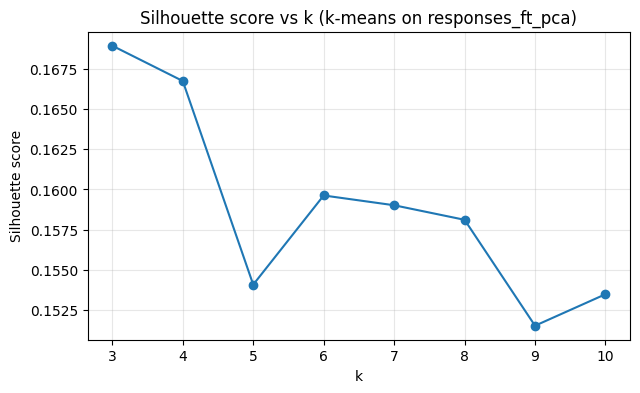

Cluster sizes:
0    172
1    183
2    151
Name: count, dtype: int64


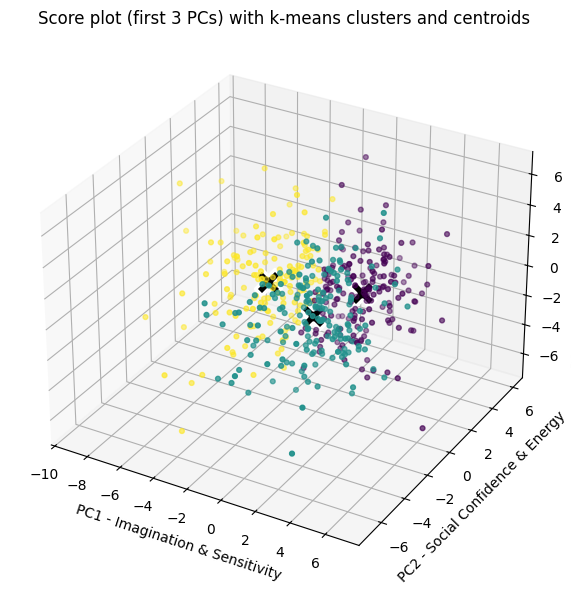

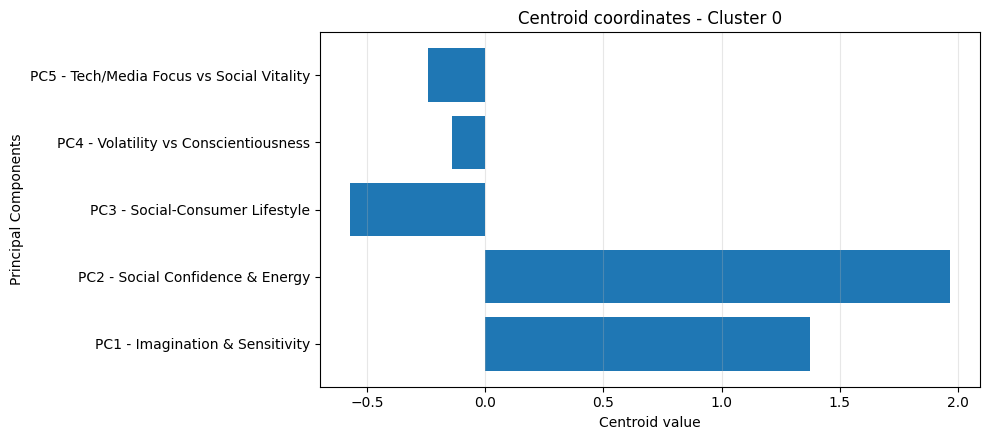

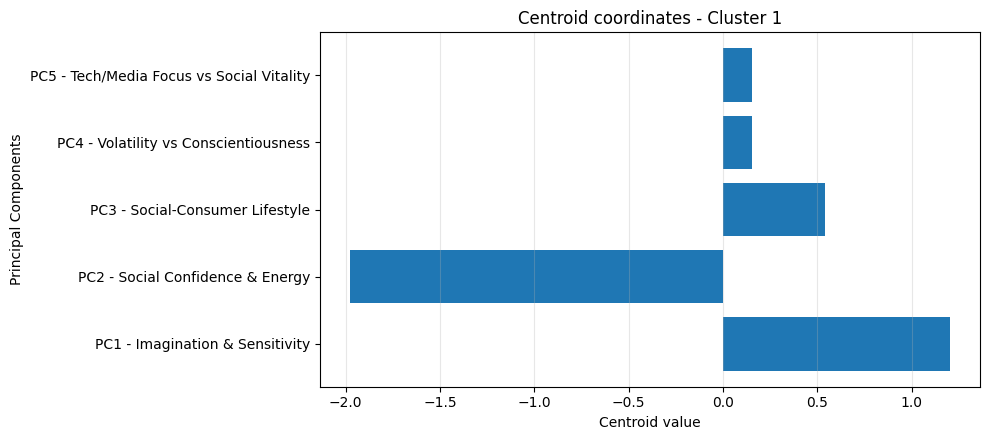

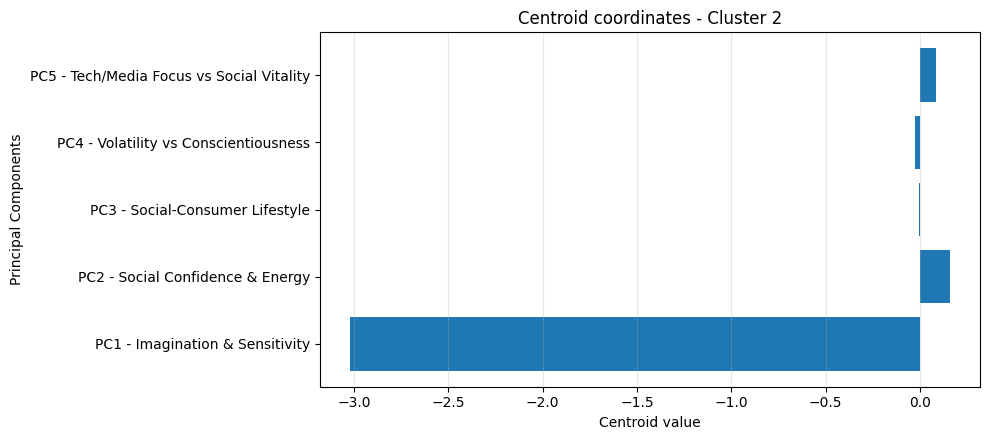

In [ ]:
X = responses_ft_pca.values.astype(float)
m = X.shape[1]

ks = list(range(3, 11))
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    labels_k = km.fit_predict(X)
    score = silhouette_score(X, labels_k)
    sil_scores.append(score)

best_idx = int(np.argmax(sil_scores))
best_k = ks[best_idx]
best_score = sil_scores[best_idx]

plt.figure(figsize=(7,4))
plt.plot(ks, sil_scores, marker='o')
plt.title("Silhouette score vs k (k-means on responses_ft_pca)")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.xticks(ks)
plt.grid(True, alpha=0.3)
plt.show()

kmeans = KMeans(n_clusters=best_k, random_state=random_seed, n_init=10) 
cluster_labels = kmeans.fit_predict(X)   
centroids = kmeans.cluster_centers_

print("Cluster sizes:")
print(pd.Series(cluster_labels).value_counts().sort_index())

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(responses_ft_pca.iloc[:,0], responses_ft_pca.iloc[:,1], responses_ft_pca.iloc[:,2],
            c=cluster_labels, s=12)

ax.scatter(
    centroids[:,0], centroids[:,1], centroids[:,2],
    s=350, marker="X",
    c="black", alpha=1.0,
    edgecolors="white", linewidths=2.5,
    depthshade=False
)

ax.set_title("Score plot (first 3 PCs) with k-means clusters and centroids")
ax.set_xlabel(pc_names[0])
ax.set_ylabel(pc_names[1])
ax.set_zlabel(pc_names[2])
plt.tight_layout()
plt.show()

centroids_df = pd.DataFrame(centroids, columns=pc_names)
centroids_df.index = [f"Cluster {i}" for i in range(best_k)]

for i in range(best_k):
    c = centroids_df.iloc[i]

    plt.figure(figsize=(10, 4.5))
    # Orizontal bar plot, the names are too long
    plt.barh(c.index, c.values)
    plt.title(f"Centroid coordinates - Cluster {i}")
    plt.xlabel("Centroid value")
    plt.ylabel("Principal Components")
    plt.grid(True, axis="x", alpha=0.3)

    plt.tight_layout()
    plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

**Cluster 0 — “Outgoing Imaginative”**<br>
Cluster 0 shows strong positive scores on PC2 (Social Confidence & Energy) and clear positive scores on PC1 (Imagination & Sensitivity), describing socially confident, energetic individuals with a creative/emotionally oriented profile. The centroid is moderately negative on PC3 (Social-Consumer Lifestyle), suggesting a lower inclination toward consumerism and appearance-driven habits. Slightly negative values on PC4 (Volatility vs Conscientiousness) and PC5 (Tech/Media Focus vs Social Vitality) indicate a mild tendency toward stability/conscientiousness and relatively higher social vitality compared with tech/media focus.

**Cluster 1 — “Sensitive but Socially Anxious Trend-Oriented**<br>
Cluster 1 is positive on PC1 (Imagination & Sensitivity) but strongly negative on PC2 (Social Confidence & Energy), indicating imaginative and sensitive individuals with lower social confidence and/or stronger public-speaking anxiety. The centroid is positive on PC3 (Social-Consumer Lifestyle), consistent with higher orientation toward shopping, entertainment, and appearance-related preferences. Small positive scores on PC4 and PC5 suggest a slight shift toward behavioural volatility (vs conscientiousness) and a modest tilt toward tech/media focus relative to social vitality.

**Cluster 2 — “Pragmatic Low-Imagination**<br>
Cluster 2 is characterized by a strongly negative score on PC1 (Imagination & Sensitivity), marking the opposite pole of the creative/romantic/cultural dimension. The remaining centroid coordinates are close to zero, with PC2 slightly positive and PC3–PC4 essentially neutral, indicating no strong social-confidence, consumer-lifestyle, or volatility/conscientiousness signature. PC5 is only mildly positive, suggesting at most a weak tendency toward tech/media focus. Overall, the cluster is primarily defined by low imagination/sensitivity.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):
We performed clustering in the PCA score space (first 5 PCs) and then selected external labels whose meaning can be related to the interpreted PCs, to assess whether clusters align with plausible demographic or background differences.

**Age**<br>
Age may influence PC3 (Social-Consumer Lifestyle) and PC5 (Tech/Media Focus vs Social Vitality), since consumption habits, entertainment preferences, and technology/media use often vary with age. Therefore, different age distributions across clusters can validate whether clusters reflect lifestyle/tech patterns.

**Gender**<br>
Gender can be associated (at population level) with differences in interests, social behaviour, and consumption styles, potentially affecting PC1 (Imagination & Sensitivity), PC2 (Social Confidence & Energy), and PC3 (Social-Consumer Lifestyle). Comparing gender proportions across clusters checks if clusters capture interpretable behavioural profiles.

**Home Type**<br>
Living environment can shape social opportunities and leisure habits, plausibly influencing PC2 (Social Confidence & Energy) and PC3 (Social-Consumer Lifestyle). For example, more urban contexts may correlate with higher social activity or consumer-oriented lifestyles. Hence these labels provide a meaningful external check.

#### Write the code for the visualizations cited in item 2 above:

Cluster sizes:
 cluster
0    172
1    183
2    151
Name: count, dtype: int64


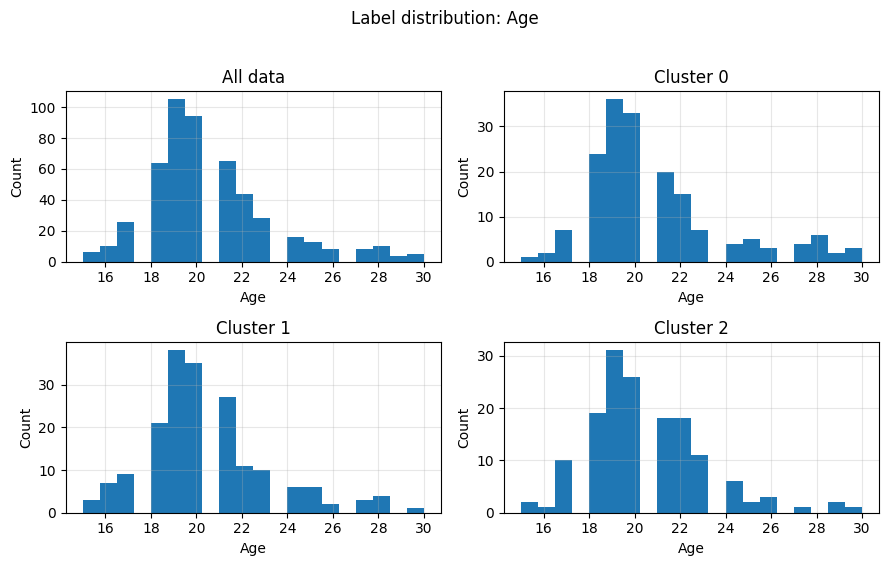

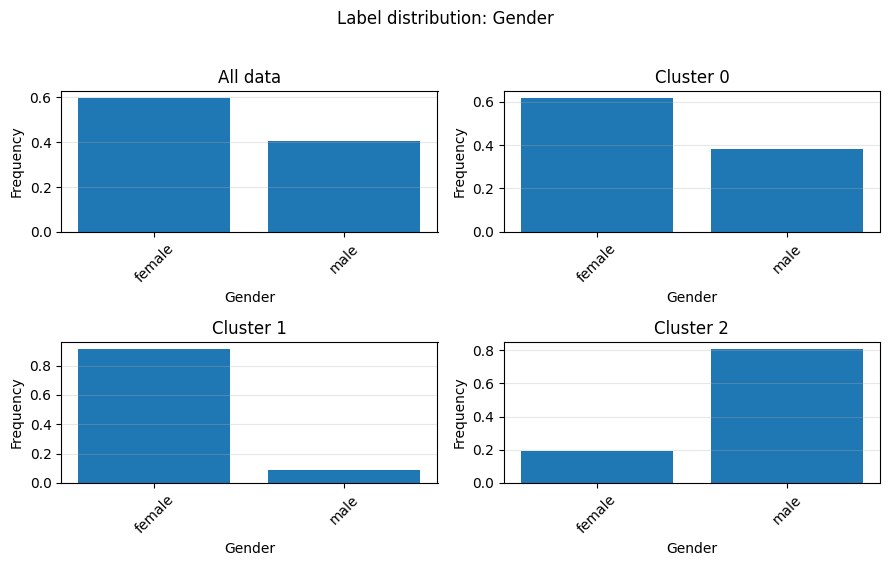

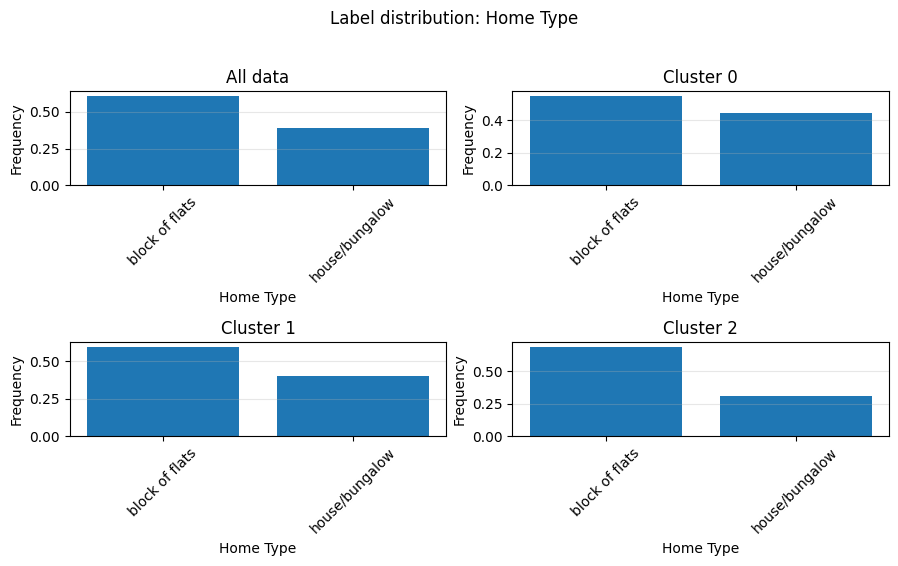

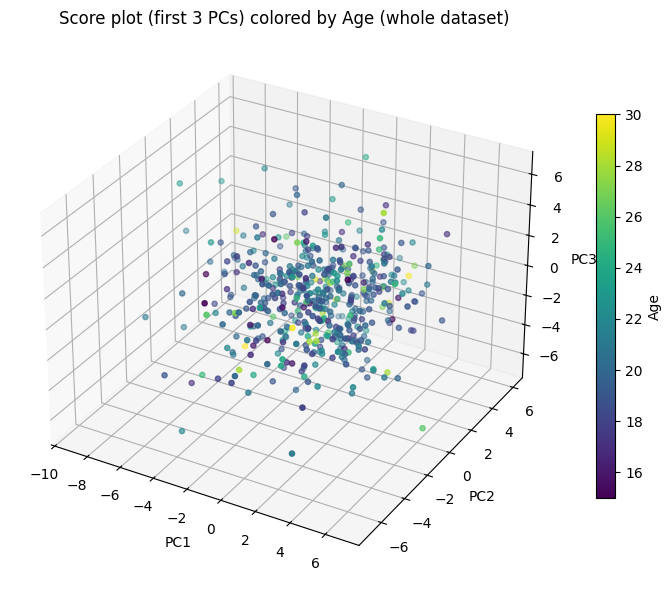

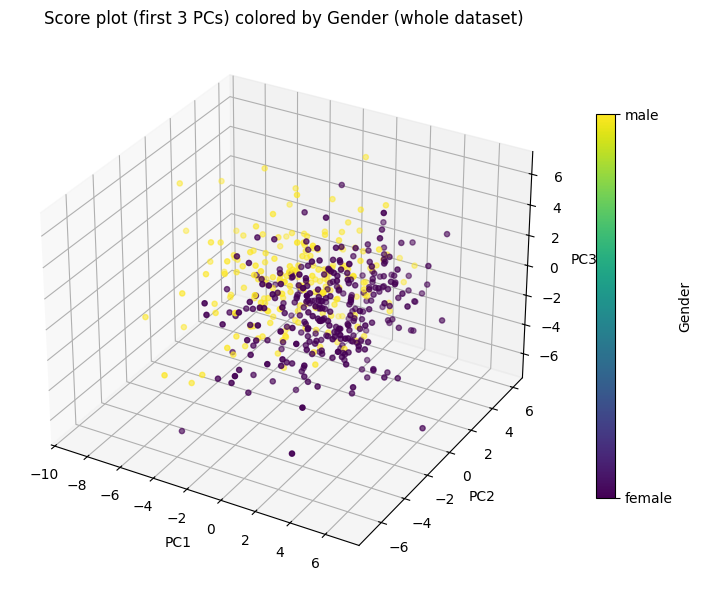

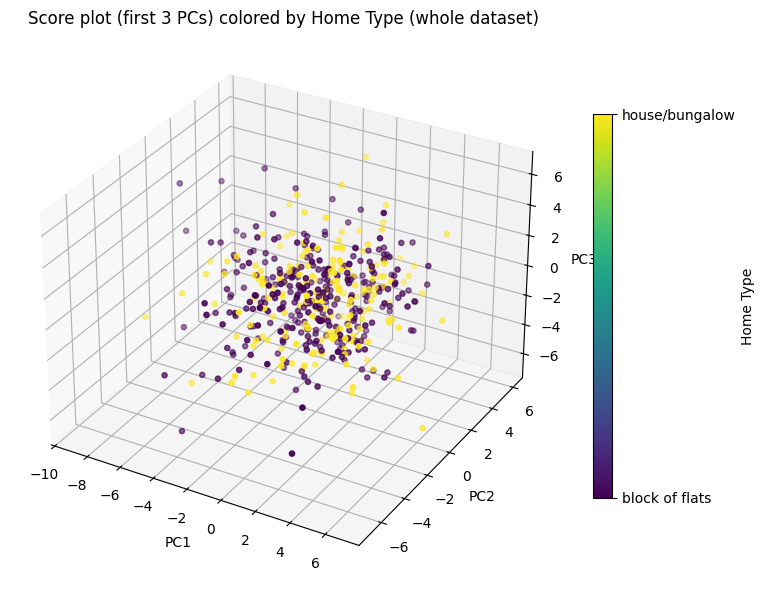

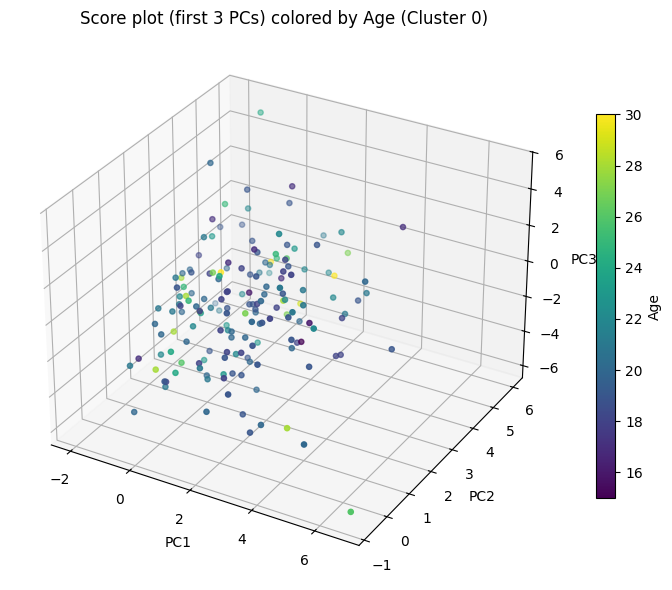

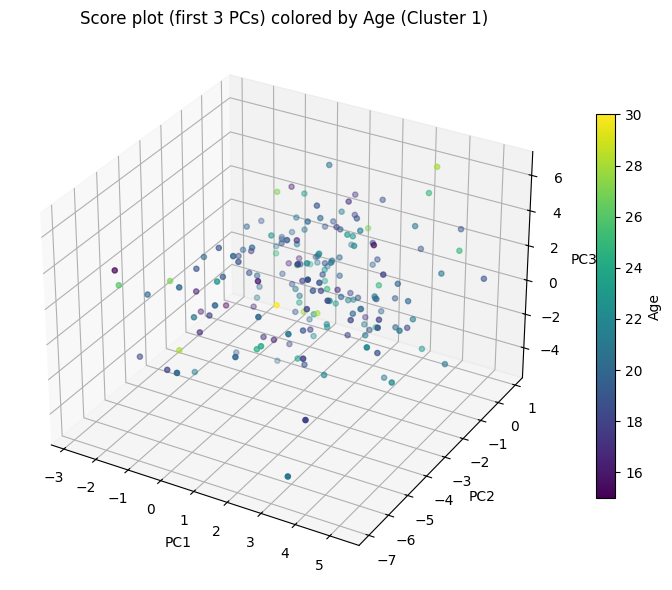

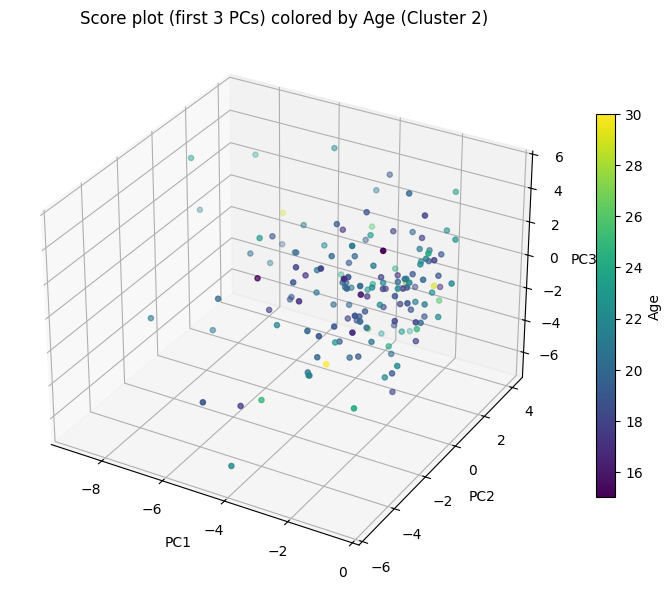

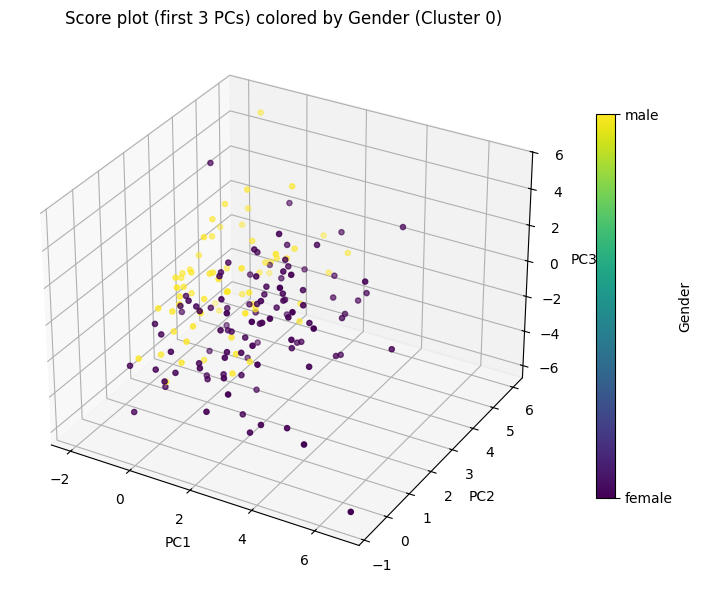

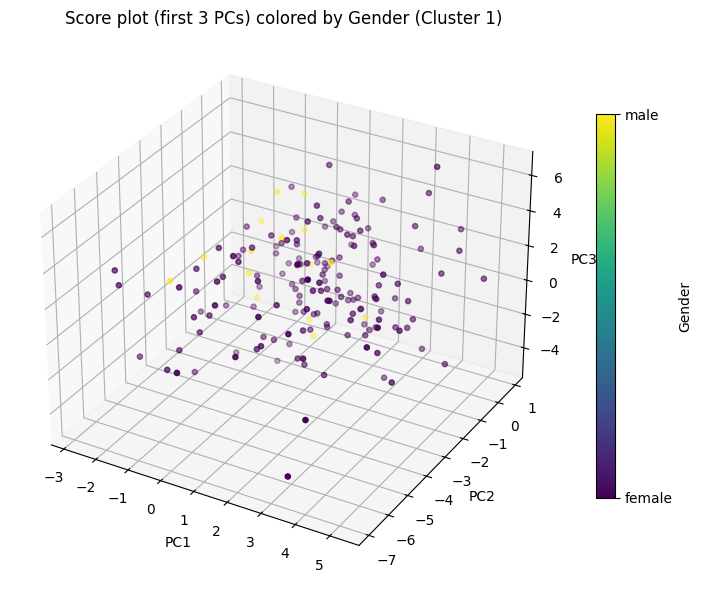

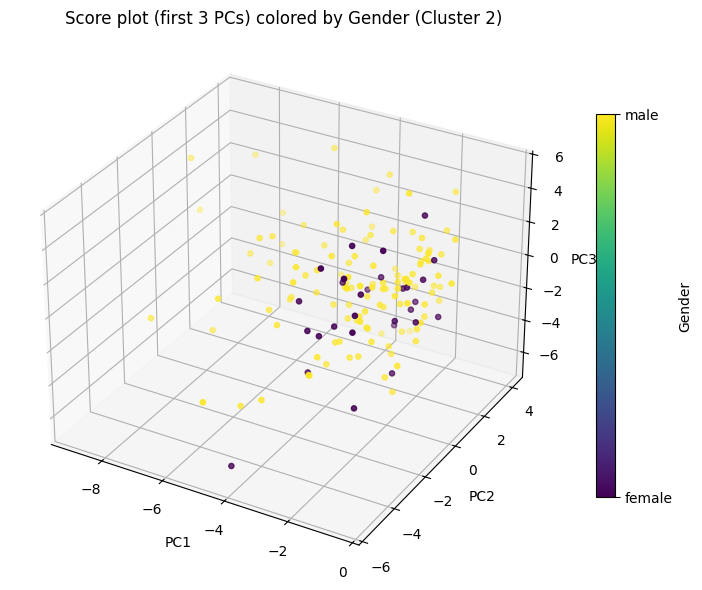

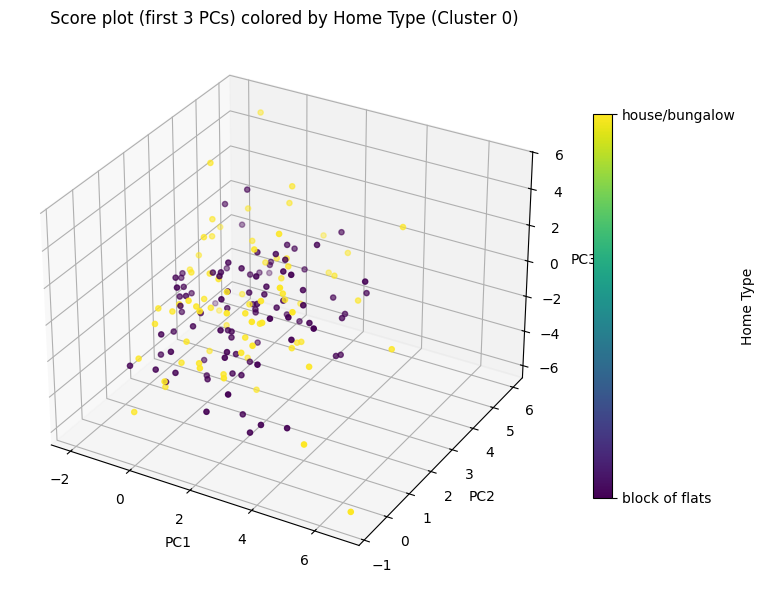

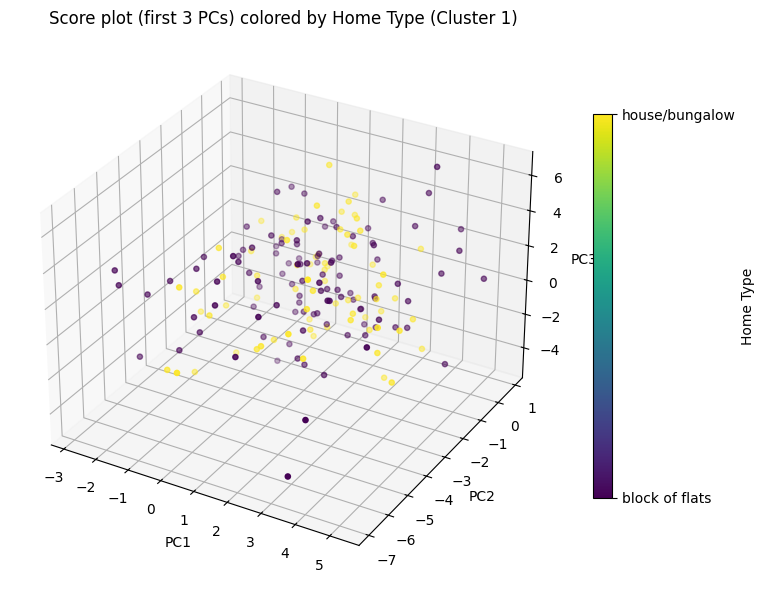

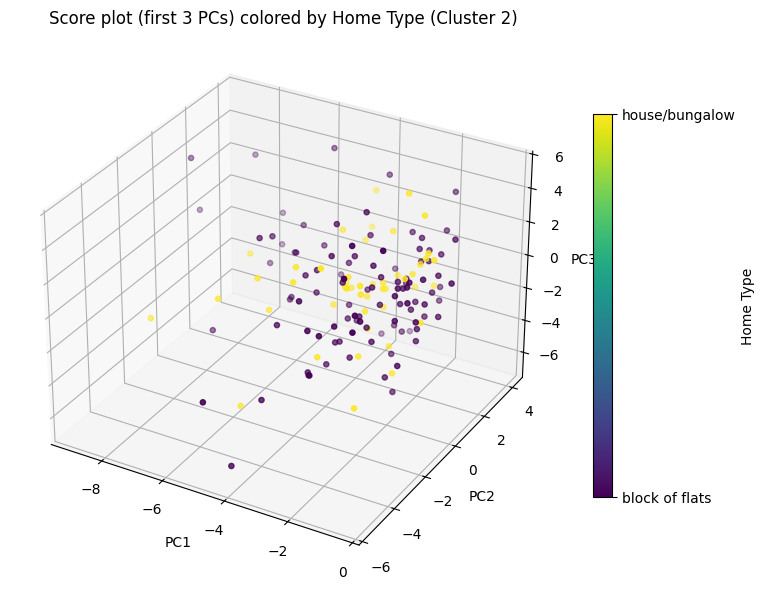

In [ ]:
selected_labels = ['Age', 'Gender', 'Home Type']

# Build a single dataframe with: cluster id + first PCs + selected labels
df_eval = pd.DataFrame(index=responses_ft_pca.index)

df_eval['cluster'] = cluster_labels  # type: ignore

# Add the first 3 PC scores (if m < 3, we add only the available ones)
m = responses_ft_pca.shape[1]
n_plot_pcs = min(m, 3)

for i in range(n_plot_pcs):
    pc_cols = [f"PC{i}" for i in range(1, n_plot_pcs + 1)]
    df_eval[f"PC{i+1}"] = responses_ft_pca.iloc[:, i].values

# Add selected labels from the original dataset
for lab in selected_labels:
    df_eval[lab] = responses.loc[df_eval.index, lab]
print("Cluster sizes:\n", df_eval['cluster'].value_counts().sort_index())

def plot_label_2x2_by_cluster(responses_lb, cluster_labels, label, bins=20):
    # label series for the full dataset
    s_all = responses_lb[label]
    cl = pd.Series(cluster_labels, index=responses_lb.index)

    fig, axes = plt.subplots(2, 2, figsize=(9, 5.5))
    axes = axes.ravel()

    subsets = [
        ("All data", s_all),
        ("Cluster 0", s_all[cl == 0]),
        ("Cluster 1", s_all[cl == 1]),
        ("Cluster 2", s_all[cl == 2]),
    ]

    # If the label is numeric -> histogram
    if pd.api.types.is_numeric_dtype(s_all):
        edges = np.histogram_bin_edges(
            pd.to_numeric(s_all, errors="coerce").dropna().values, bins=bins
        )

        for ax, (title, s_sub) in zip(axes, subsets):
            x = pd.to_numeric(s_sub, errors="coerce").dropna().values
            ax.hist(x, bins=edges)
            ax.set_title(title)
            ax.set_xlabel(label)
            ax.set_ylabel("Count")
            ax.grid(True, alpha=0.3)

    # Otherwise -> categorical bar plot (frequency)
    else:
        cats = s_all.astype("object").fillna("NaN").value_counts().index.tolist()

        for ax, (title, s_sub) in zip(axes, subsets):
            ss = s_sub.astype("object").fillna("NaN")
            vc = ss.value_counts(normalize=True).reindex(cats).fillna(0.0)
            ax.bar(vc.index, vc.values)
            ax.set_title(title)
            ax.set_xlabel(label)
            ax.set_ylabel("Frequency")
            ax.tick_params(axis="x", rotation=45)
            ax.grid(True, axis="y", alpha=0.3)

    fig.suptitle(f"Label distribution: {label}", y=1.02)
    plt.tight_layout()
    plt.show()


# Plot all selected labels
for lab in selected_labels:
    plot_label_2x2_by_cluster(df_eval, df_eval['cluster'], lab, bins=20)
    
    
def score_plot_colored_by_label(df, label, pc_cols, title_suffix=""):
    m_plot = len(pc_cols)

    y = df[label]
    
    if y.dtype == "object" or str(y.dtype).startswith("category"):
        y_codes, uniques = pd.factorize(y, sort=True)
        c_vals = y_codes
        cb_ticks = np.arange(len(uniques))
        cb_ticklabels = [str(u) for u in uniques]
        is_cat = True
    else:
        c_vals = y.values.astype(float)
        is_cat = False
        
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")
    sc = ax.scatter(df[pc_cols[0]], df[pc_cols[1]], df[pc_cols[2]], c=c_vals, s=14)
    ax.set_title(f"Score plot (first 3 PCs) colored by {label} {title_suffix}")
    ax.set_xlabel(pc_cols[0])
    ax.set_ylabel(pc_cols[1])
    ax.set_zlabel(pc_cols[2])
    cb = fig.colorbar(sc, ax=ax, shrink=0.7)
    if is_cat:
        cb.set_ticks(cb_ticks)
        cb.set_ticklabels(cb_ticklabels)
    cb.set_label(label)
    plt.tight_layout()
    plt.show()
    
for lab in selected_labels:
    score_plot_colored_by_label(df_eval, lab, pc_cols, title_suffix="(whole dataset)")

for lab in selected_labels:
    for c in sorted(df_eval['cluster'].unique()):
        df_c = df_eval[df_eval['cluster'] == c]
        score_plot_colored_by_label(df_c, lab, pc_cols, title_suffix=f"(Cluster {c})")



#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

**Age**<br>
Across the whole dataset, age is concentrated around 18–22, with a smaller tail up to ~30. The three clusters show very similar age distributions, all peaking around 19–21. Cluster 0 appears to contain slightly more older individuals (more mass in the 24–30 range), but the difference is not strong. Overall, age does not seem to be a major driver of the clustering, suggesting that clusters are mainly explained by behavioural/interest dimensions captured by the PCs rather than by age.

**Gender**<br>
Gender shows a clear separation across clusters. In the overall dataset, females are more frequent than males, but clusters are strongly unbalanced: Cluster 1 is predominantly female, while Cluster 2 is predominantly male. Cluster 0 remains closer to the global distribution (still female-majority but less extreme). This suggests that the behavioural patterns captured by the PCs and used for k-means may correlate with gender-related differences in the survey responses, even though gender was not used as an input feature for clustering.

**Home Type**<br>
In the full dataset, “block of flats” is more common than “house/bungalow”. Cluster 0 and Cluster 1 are similar to the overall distribution, with a moderate presence of house/bungalow. Cluster 2 shows a clearer shift: it has a higher proportion of block of flats and a lower proportion of house/bungalow compared to the other clusters. This suggests a small but visible relationship between clustering outcomes and living context, potentially connected to lifestyle or social-environment factors reflected in the PCs.

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

Global silhouette score (k=3): 0.1690


,mean silhouette (cluster)
0,0.171601
1,0.175117
2,0.158486


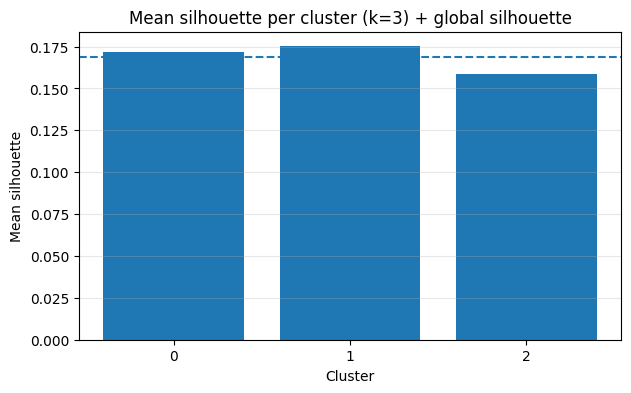

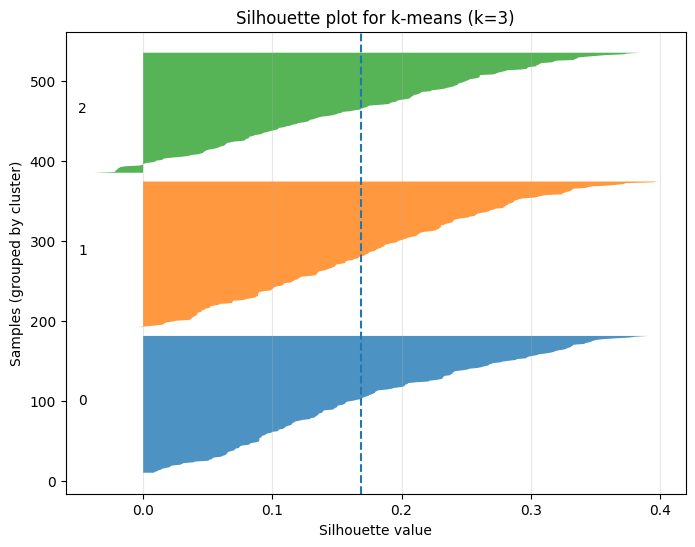

In [ ]:
# [write the code here]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples

X = responses_ft_pca.values.astype(float)
labels = cluster_labels
k = best_k

# Silhouette generale
sil_global = silhouette_score(X, labels)
print(f"Global silhouette score (k={k}): {sil_global:.4f}")

# Silhouette per-sample and mean per cluster
sil_samples = silhouette_samples(X, labels)

cluster_sil_means = {}
for c in range(k):
    cluster_sil_means[c] = float(np.mean(sil_samples[labels == c]))

cluster_sil_means = pd.Series(cluster_sil_means).sort_index()
display(cluster_sil_means.to_frame("mean silhouette (cluster)"))

# Barplot silhouette media per cluster + linea silhouette globale
plt.figure(figsize=(7,4))
plt.bar(cluster_sil_means.index.astype(str), cluster_sil_means.values)
plt.axhline(sil_global, linestyle='--')
plt.title(f"Mean silhouette per cluster (k={k}) + global silhouette")
plt.xlabel("Cluster")
plt.ylabel("Mean silhouette")
plt.grid(True, axis='y', alpha=0.3)
plt.show()

y_lower = 10  # offset verticale to separate
plt.figure(figsize=(8,6))

for c in range(k):
    vals = sil_samples[labels == c]
    vals_sorted = np.sort(vals)
    size_c = vals_sorted.shape[0]

    y_upper = y_lower + size_c

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, vals_sorted, alpha=0.8)
    plt.text(-0.05, y_lower + 0.5 * size_c, str(c))  # label cluster

    y_lower = y_upper + 10  # space between clusters

plt.axvline(sil_global, linestyle='--')
plt.title(f"Silhouette plot for k-means (k={k})")
plt.xlabel("Silhouette value")
plt.ylabel("Samples (grouped by cluster)")
plt.grid(True, axis='x', alpha=0.3)
plt.show()


#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

The silhouette analysis confirms that the clustering structure is weak but not random. The global silhouette is around 0.17, which is relatively low and indicates overlap between clusters in the PCA score space. In the silhouette plot, most samples have positive values (good sign), but many are close to zero, meaning that several points lie near cluster boundaries. The mean silhouette is fairly similar across clusters (≈0.16–0.18), so no cluster is clearly “bad”, although Cluster 2 is slightly lower, suggesting it is the least compact/separated. This matches what we observed in the score plots: points form a dense cloud with limited separation, and centroids differ mainly along a few PCs (especially PC1 and PC2), producing soft behavioural profiles rather than sharply separated groups.